In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA


In [2]:
oil_prices = pd.read_excel('oil_exs.xlsx')
oil_prices

,date,rus_sunf,mal_palm,us_soybean,ch_rapseed
0,2024-01-01,813,815,1232,7652
1,2024-02-01,803,810,1128,7795
2,2024-03-01,802,881,1205,8058
3,2024-04-01,828,862,1163,8272
4,2024-05-01,834,825,1203,8770
5,2024-06-01,910,832,1150,8334
6,2024-07-01,891,846,1014,8414
7,2024-08-01,910,860,982,8381
8,2024-09-01,957,921,1057,9455
9,2024-10-01,1020,1013,994,9441


In [3]:
# 1) Умножение данных в столбце 'ch_rapseed' на 0.136428
oil_prices['ch_rapseed'] = oil_prices['ch_rapseed'] * 0.136428


In [4]:
oil_prices

,date,rus_sunf,mal_palm,us_soybean,ch_rapseed
0,2024-01-01,813,815,1232,1043.947056
1,2024-02-01,803,810,1128,1063.456260
2,2024-03-01,802,881,1205,1099.336824
3,2024-04-01,828,862,1163,1128.532416
4,2024-05-01,834,825,1203,1196.473560
5,2024-06-01,910,832,1150,1136.990952
6,2024-07-01,891,846,1014,1147.905192
7,2024-08-01,910,860,982,1143.403068
8,2024-09-01,957,921,1057,1289.926740
9,2024-10-01,1020,1013,994,1288.016748


In [5]:
oil_labels = {
    'rus_sunf': 'Российское подсолнечное масло',
    'mal_palm': 'Малайзийское пальмовое масло',
    'us_soybean': 'Соевое масло США',
    'ch_rapseed': 'Китайское рапсовое масло'
}


In [6]:
oil_prices['date'] = pd.to_datetime(oil_prices['date'])


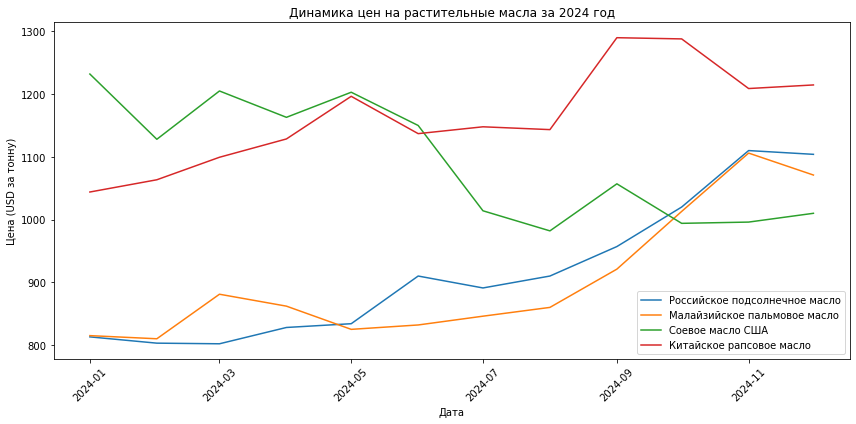

In [7]:
plt.figure(figsize=(12, 6))
for column in oil_labels.keys():
    plt.plot(oil_prices['date'], oil_prices[column], label=oil_labels[column])
plt.title('Динамика цен на растительные масла за 2024 год')
plt.xlabel('Дата')
plt.ylabel('Цена (USD за тонну)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("Динамика_цен_RastMasla_2024.jpeg", format='jpeg')
plt.show()


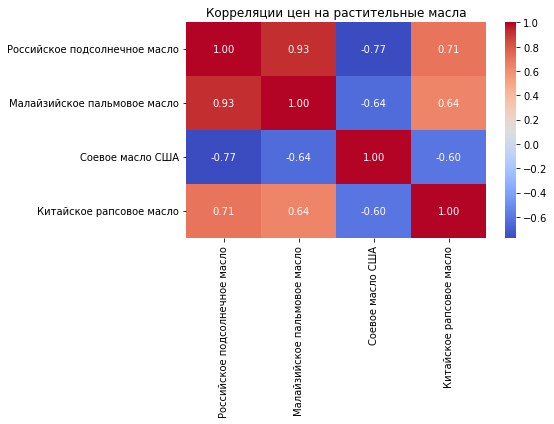

In [8]:
correlation = oil_prices[['rus_sunf', 'mal_palm', 'us_soybean', 'ch_rapseed']].corr()

col_labels = [oil_labels[col] for col in correlation.columns]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=col_labels, yticklabels=col_labels)
plt.title('Корреляции цен на растительные масла')
plt.tight_layout()

plt.savefig("Корреляция_цен_RastMasla.jpeg", format='jpeg')
plt.show()


In [10]:
oil_prices

,date,rus_sunf,mal_palm,us_soybean,ch_rapseed
0,2024-01-01,813,815,1232,1043.947056
1,2024-02-01,803,810,1128,1063.456260
2,2024-03-01,802,881,1205,1099.336824
3,2024-04-01,828,862,1163,1128.532416
4,2024-05-01,834,825,1203,1196.473560
5,2024-06-01,910,832,1150,1136.990952
6,2024-07-01,891,846,1014,1147.905192
7,2024-08-01,910,860,982,1143.403068
8,2024-09-01,957,921,1057,1289.926740
9,2024-10-01,1020,1013,994,1288.016748


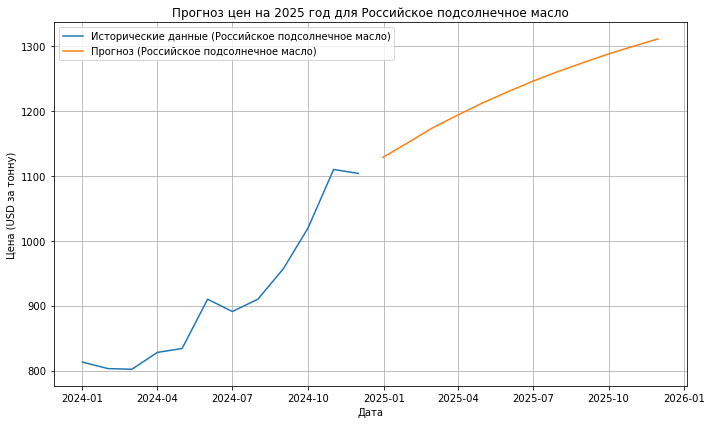

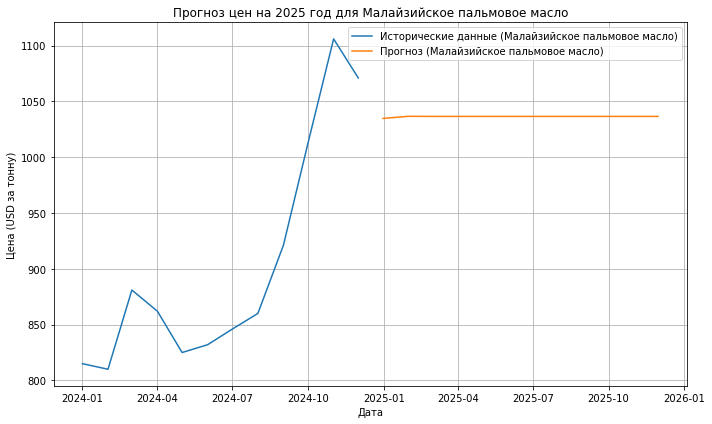

D:\ Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


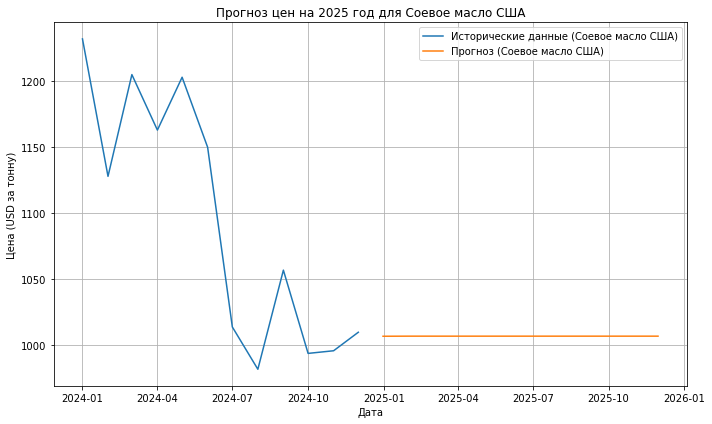

D:\ Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


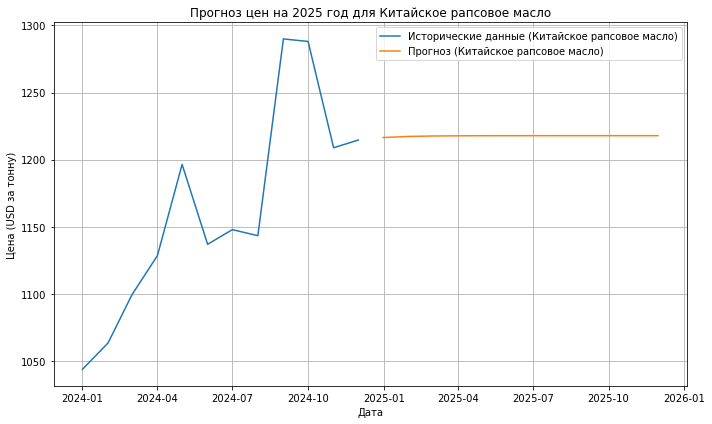

In [11]:
from sklearn.model_selection import train_test_split

forecast = {}
for column in oil_labels.keys():
    # Подготовка временного ряда
    series = oil_prices[column]
    model = ARIMA(series, order=(1, 1, 1))  # Параметры
    model_fit = model.fit()
    forecast[column] = model_fit.forecast(steps=12)  

    plt.figure(figsize=(10, 6))
    plt.plot(oil_prices['date'], series, label=f'Исторические данные ({oil_labels[column]})')
    plt.plot(pd.date_range(oil_prices['date'].iloc[-1], periods=12, freq='M'),
             forecast[column], label=f'Прогноз ({oil_labels[column]})')
    plt.title(f'Прогноз цен на 2025 год для {oil_labels[column]}')
    plt.xlabel('Дата')
    plt.ylabel('Цена (USD за тонну)')
    plt.legend()
    plt.grid()
    plt.tight_layout()

    plt.savefig(f"Прогноз_цен_{oil_labels[column].replace(' ', '_')}_2025.jpeg", format='jpeg')
    plt.show()
